In [1]:
# First need to import dataset from Github
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL_WHOLE = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-complete.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating dataframe
heart_complete_df = fetch_and_load_from_url(DATA_URL_WHOLE, DATA_PATH, "heart_complete.txt")

In [2]:
heart_complete_df.iloc[:,9]

0      1
1      1
2      0
3      1
4      1
      ..
457    0
458    1
459    0
460    0
461    1
Name: chd, Length: 462, dtype: int64

### 1. Split the datset into train and test samples

In [3]:
# Using train_test_split function from sklearn to split the data
from sklearn.model_selection import train_test_split

# Divide data into X and Y
x_data = heart_complete_df.iloc[:,0:9]
y_data = heart_complete_df.iloc[:,9]

# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=66)

In [4]:
x_train

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
292,150,0.18,4.14,14.40,Absent,53,23.43,7.71,44
349,162,5.60,4.24,22.53,Absent,29,22.91,5.66,60
355,134,0.90,3.18,23.66,Present,52,23.26,27.36,58
221,164,0.50,6.95,39.64,Present,47,41.76,3.81,46
335,162,6.94,4.55,33.36,Present,52,27.09,32.06,43
...,...,...,...,...,...,...,...,...,...
122,120,0.00,5.01,26.13,Absent,64,26.21,12.24,33
51,134,2.50,3.66,30.90,Absent,52,27.19,23.66,49
119,130,0.00,3.92,25.55,Absent,68,28.02,0.68,27
316,124,0.00,2.28,24.86,Present,50,22.24,8.26,38


### 2. Apply the regression model that I think is most suited for problem
- Will be using logistic regression

In [5]:
# import logistic regression library and preprocessing to get data into needed format for regression model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

# Need to do column preprocessing so that can use model
# Converting column to String so that can perform label encoding
x_train["famhist"] = x_train["famhist"].astype(str)
x_test["famhist"] = x_test["famhist"].astype(str)

# Doing label encoding so that model can have its float values

# Creating label encoding object
label_encoder = preprocessing.LabelEncoder()

# Selecting column to be transformed
famhist_data = x_train["famhist"]
famhist_test_data = x_test["famhist"]

# Fitting and transforming string values to unique ints based on their current value
famhist_trans = label_encoder.fit_transform(famhist_data)
famhist_test_trans = label_encoder.transform(famhist_test_data)

# Adding transformed array in place of original data
x_train["famhist"] = famhist_trans
x_test["famhist"] = famhist_test_trans

# Creating logistic regression object with maximum number of iterations set to 1000 so that model can complete its training
logistic = LogisticRegression(max_iter=1000)

logistic.fit(x_train, y_train)

y_predict = logistic.predict(x_test)

<ipython-input-5-1e852889b6ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["famhist"] = x_train["famhist"].astype(str)
<ipython-input-5-1e852889b6ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["famhist"] = x_test["famhist"].astype(str)
<ipython-input-5-1e852889b6ae>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

### 3. Compare my prediction result with the first technique

Precision of Task 2: 0.675
Recall of Task 2: 0.491
F1 Score of Task 2: 0.568
Accuracy of Task 2: 0.705


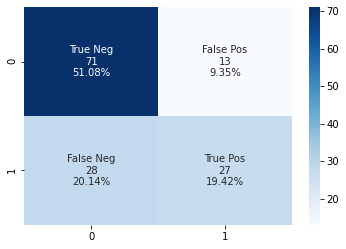

In [6]:
# Computing the confusion matrix for Part 2 result
# importing sklearn library for confusion matrix function
from sklearn.metrics import confusion_matrix
# Using seaborn for visualization
import seaborn as sns
import numpy as np
# Creating confusion matrix with test values and predicted Y values
cf_matrix_2 = confusion_matrix(y_test, y_predict)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_2.flatten()/np.sum(cf_matrix_2)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix_2, annot=labels, fmt='', cmap="Blues")

# Computing the Precision, Recall and F1 Score from matrix and accuracy
precision = cf_matrix_2[1,1] / sum(cf_matrix_2[:,1])
recall = cf_matrix_2[1,1] / sum(cf_matrix_2[1,:])
f1_score = 2*precision*recall / (precision + recall)
accuracy  = np.trace(cf_matrix_2) / float(np.sum(cf_matrix_2))
print("Precision of Task 2: {:0.3f}".format(precision))
print("Recall of Task 2: {:0.3f}".format(recall))
print("F1 Score of Task 2: {:0.3f}".format(f1_score))
print("Accuracy of Task 2: {:0.3f}".format(accuracy))

# Credit to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for visualizing the Confusion Matrix